<a href="https://colab.research.google.com/github/Sagar-modelling/Open_CV_tutorial/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

In [ ]:
def Divide_by_max(img):
  return img/255

In [ ]:
def min_max(img):
  img_min = np.min(img)
  img_max = np.max(img)
  return (img-img_min)/(img_max-img_min)

In [ ]:
def standardization(img):
  mu = img.mean()
  std = img.std()
  return (img-mu)/std

In [3]:
from google.colab.patches import cv2_imshow

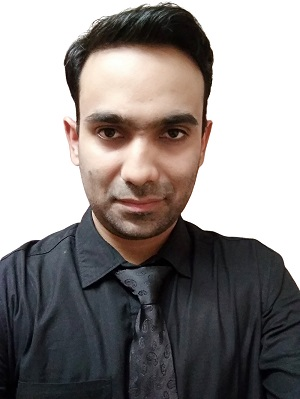

In [ ]:
#!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('/content/sagar image.jpg',cv2.IMREAD_UNCHANGED)

cv2_imshow(img)

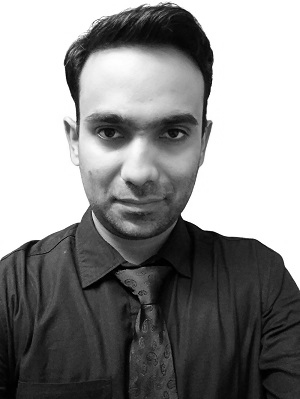

In [ ]:
out = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(out)

(399, 300, 3)


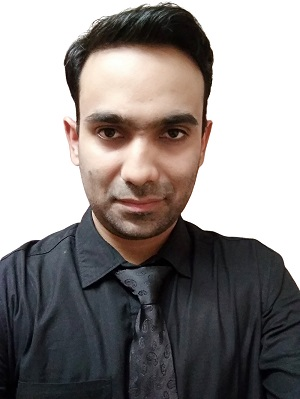

In [ ]:
img = cv2.imread('/content/sagar image.jpg',cv2.IMREAD_UNCHANGED)
print(img.shape)
cv2_imshow(img)

(600, 600, 3)


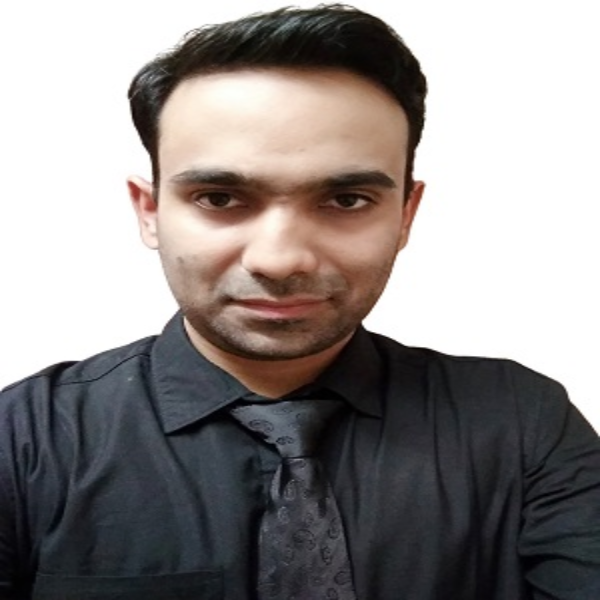

In [ ]:
out = cv2.resize(img,(600,600)) # using dsize
print(out.shape)
cv2_imshow(out)

(798, 600, 3)


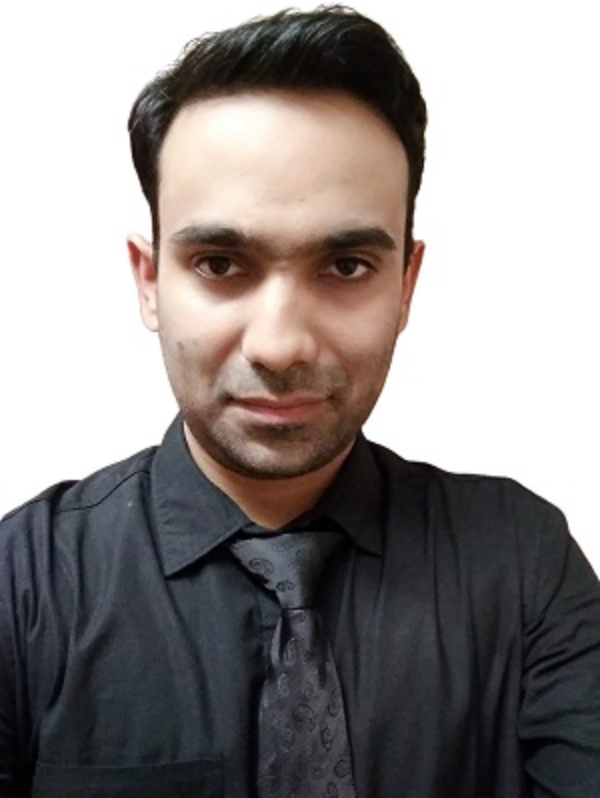

In [ ]:
out2 = cv2.resize(img,None,fx=2,fy=2)
print(out2.shape)
cv2_imshow(out2)

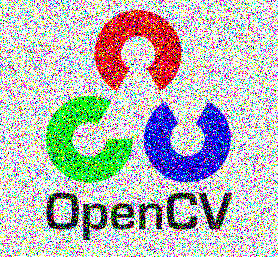

In [ ]:
img = cv2.imread('/content/salt_and_pepper.png')

cv2_imshow(img)

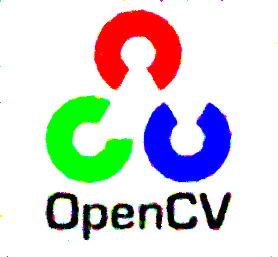

In [ ]:
out = cv2.medianBlur(img, 5)
cv2_imshow(out)

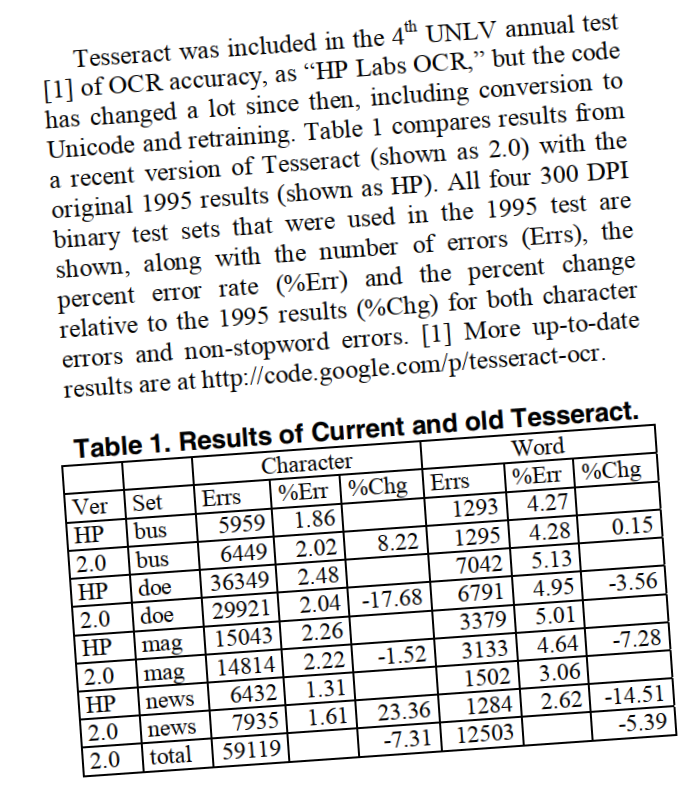

In [5]:
import cv2
img5 = cv2.imread("/content/deskew_box.PNG")
cv2_imshow(img5)

In [6]:
# Detect the box
gray = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) #threshhold image using Binary inverse method(text white,background black)
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) #contour retrievel returns contours

contours = sorted(contours, key=cv2.contourArea, reverse=True) #sorting contours by area in descending order
max_cnt = contours[0] #return the contour with maximum area

In [7]:
# Find the skew angle
angle = cv2.minAreaRect(max_cnt)[-1] #cv2.minAreaRect() for finding the minimum area rotated rectangle
#cv2.minareareact returns tuple containing rectangle center,width,height and skew angle(at -1 index)
#So, the angle of rotation given by OpenCV’s cv2.minAreaRect() is actually the angle between the line (joining the starting and endpoint) and the horizontal as shown below.
if angle < -45:
    angle = 90 + angle
    
print(angle)

-3.990912914276123


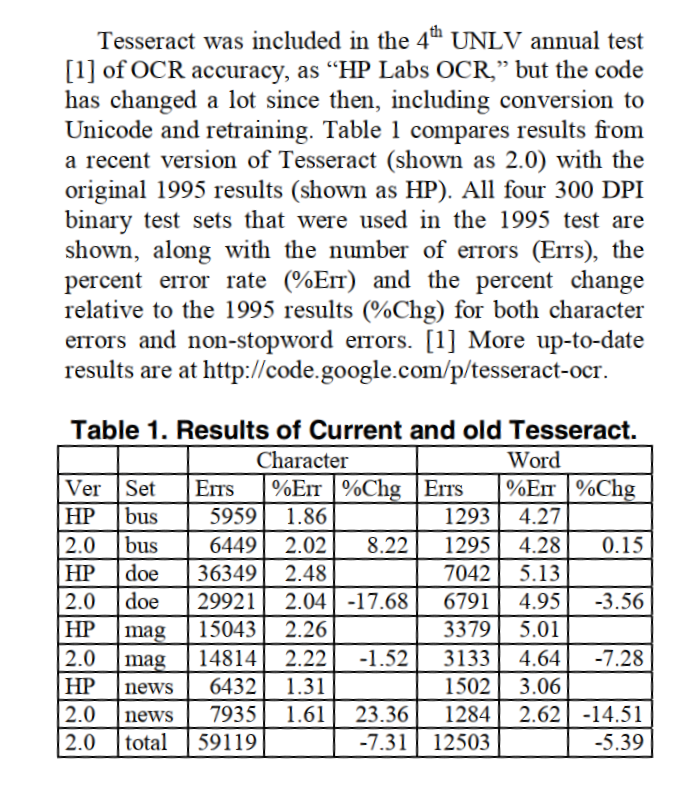

In [9]:
# Re-rotate the image
height, width, _ = img5.shape
center = (width//2, height//2)

M = cv2.getRotationMatrix2D(center, angle, 1) #transformation matrix for rotation
dst = cv2.warpAffine(img5, M, (width, height), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)

# Display the image
cv2_imshow(dst)